In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

data = pd.read_csv('data/혼자+생활하면서+곤란한+점_20230313133656.csv', header=2)
supdata = pd.read_csv('data/1인+가구를+위해+서울시에+요구되는+지원정책_20230313134042.csv', header=2)

supdata

,특성별(1),특성별(2),사례수 (명),주거지원정책 (%),안전정책 (%),경제적 여건 개선 정책 (%),건강 관련 정책 (%),1인 가구 인식개선 (%),응급 상황 대응 정책 (%),지역사회 관계망 지원 정책 (%),...,응급 상황 대응 정책 (%).1,지역사회 관계망 지원 정책 (%).1,사례수 (명).2,주거지원정책 (%).2,안전정책 (%).2,경제적 여건 개선 정책 (%).2,건강 관련 정책 (%).2,1인 가구 인식개선 (%).2,응급 상황 대응 정책 (%).2,지역사회 관계망 지원 정책 (%).2
0,전체,소계,1009,50,16,10,10,7,7,0,...,10,1,1009,65,49,26,23,19,17,2
1,5권역별,도심권,53,31,15,28,16,7,5,0,...,4,1,53,54,45,49,35,9,8,1
2,5권역별,동북권,297,71,9,3,6,3,6,2,...,12,0,297,80,46,20,21,13,18,2
3,5권역별,서북권,126,18,31,20,12,17,3,0,...,4,2,126,52,51,37,25,26,7,2
4,5권역별,서남권,352,42,19,10,13,8,9,0,...,11,2,352,53,56,21,27,22,19,2
5,5권역별,동남권,181,61,9,10,6,7,7,0,...,14,1,181,74,40,29,15,22,21,1
6,응답자성별,남성,392,50,16,8,12,6,8,0,...,11,2,392,67,49,22,23,19,19,2
7,응답자성별,여성,617,50,15,12,8,8,6,1,...,10,1,617,64,49,28,23,19,16,1
8,응답자연령별,20대 이하,315,58,21,10,4,5,3,0,...,7,0,315,81,59,24,13,14,9,0
9,응답자연령별,30~40대,302,53,13,8,10,9,7,1,...,13,1,302,63,46,23,24,23,20,2


In [6]:
# 데이터프레임 정리 
#설문 종합데이터 
mask = (data['특성별(1)'] == '응답자연령별')
data_age = data[mask]
data_age = data_age.iloc[:, [1] + list(range(22, 32))]
data_age = data_age.drop(data_age.columns[1], axis=1)

#설문 1순위데이터 
dataf_age = data[mask]
dataf_age = data_age.iloc[:, [1] + list(range(3, 10))]
dataf_age = data_age.drop(data_age.columns[1], axis=1)

#정책 종합데이터
mask1 = (supdata['특성별(1)'] == '응답자연령별')
supdata_age = supdata[mask]
supdata_age = supdata_age.iloc[:, [1] + list(range(19, 26))]
supdata_age

,특성별(2),주거지원정책 (%).2,안전정책 (%).2,경제적 여건 개선 정책 (%).2,건강 관련 정책 (%).2,1인 가구 인식개선 (%).2,응급 상황 대응 정책 (%).2,지역사회 관계망 지원 정책 (%).2
8,20대 이하,81,59,24,13,14,9,0
9,30~40대,63,46,23,24,23,20,2
10,50~60대,55,48,27,25,25,19,2
11,70대 이상,52,35,34,40,12,24,4


설문조사 종합 데이터

<AxesSubplot:xlabel='나이대', ylabel='응답비율'>

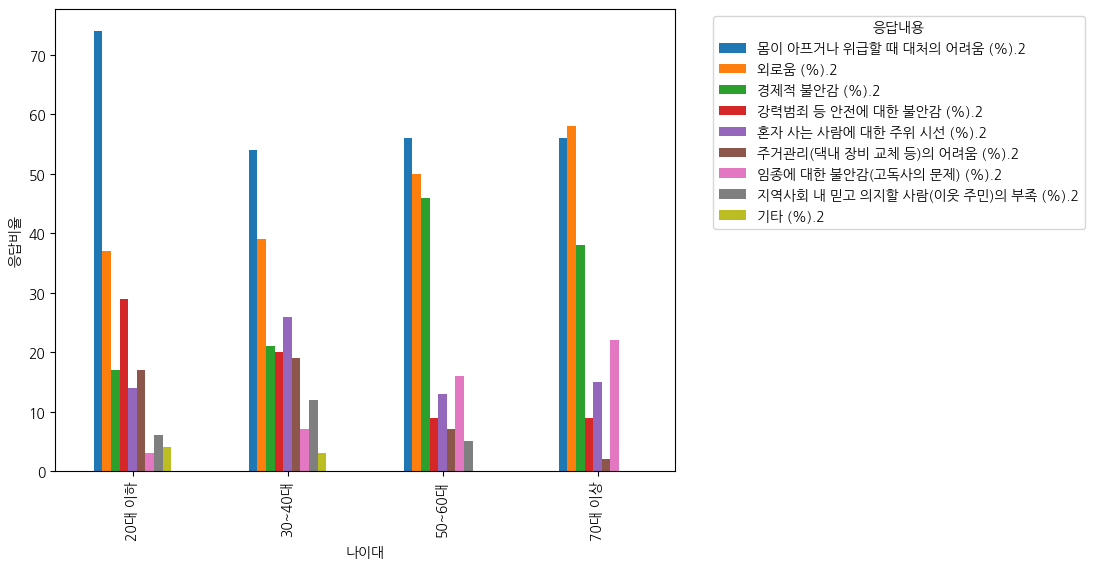

In [7]:
#1+2종합데이터로 비교할 수 있는 그룹 막대 그래프 생성
graph = data_age.set_index('특성별(2)').plot(kind='bar', stacked=False, figsize=(8,6))

graph.set_xlabel('나이대')
graph.set_ylabel('응답비율')

graph.legend(title='응답내용', loc='upper left', bbox_to_anchor=(1.05, 1))

graph

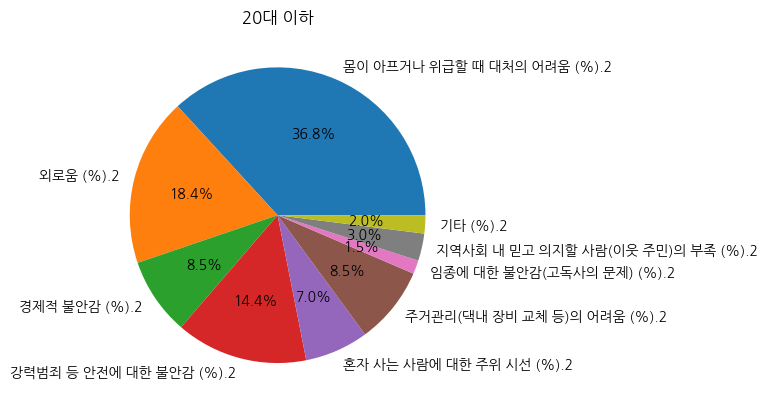

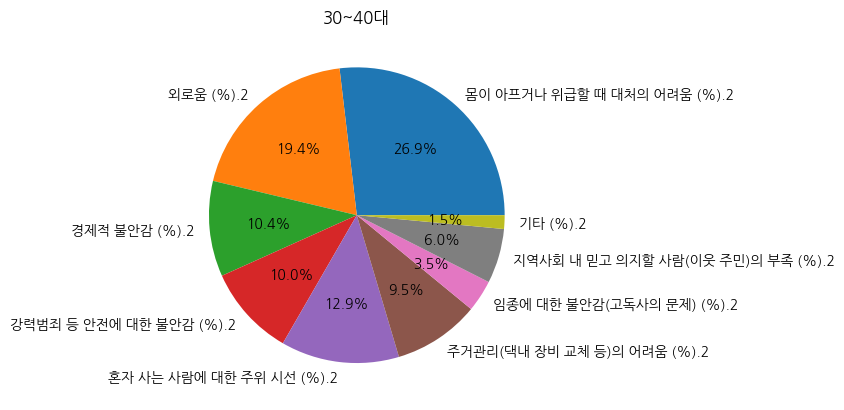

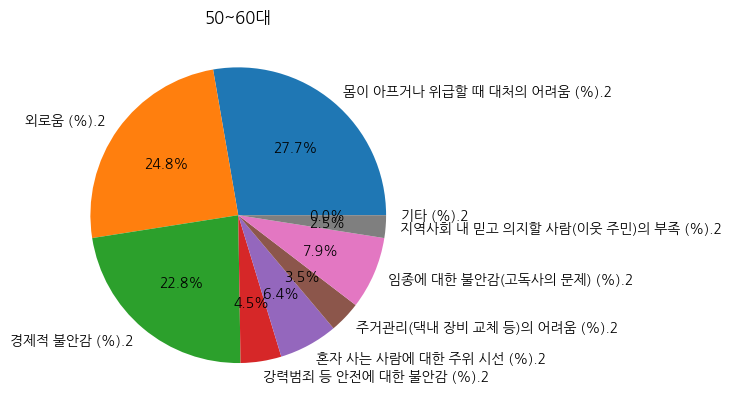

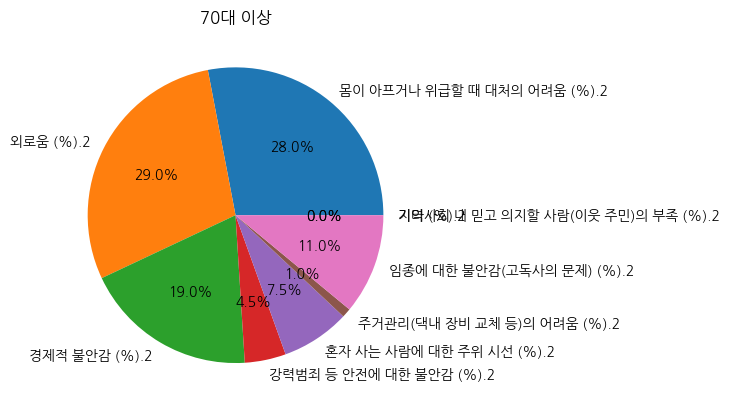

In [8]:
#파이차트로 만들기
for i in range(0,4):
    data = data_age.iloc[i, 1:]
    labels = data_age.columns[1:]
    plt.pie(data, labels=labels, autopct='%1.1f%%')
    plt.title(data_age.iloc[i, 0])
    plt.show()

설문조사 1순위 데이터

<AxesSubplot:xlabel='나이대', ylabel='응답비율'>

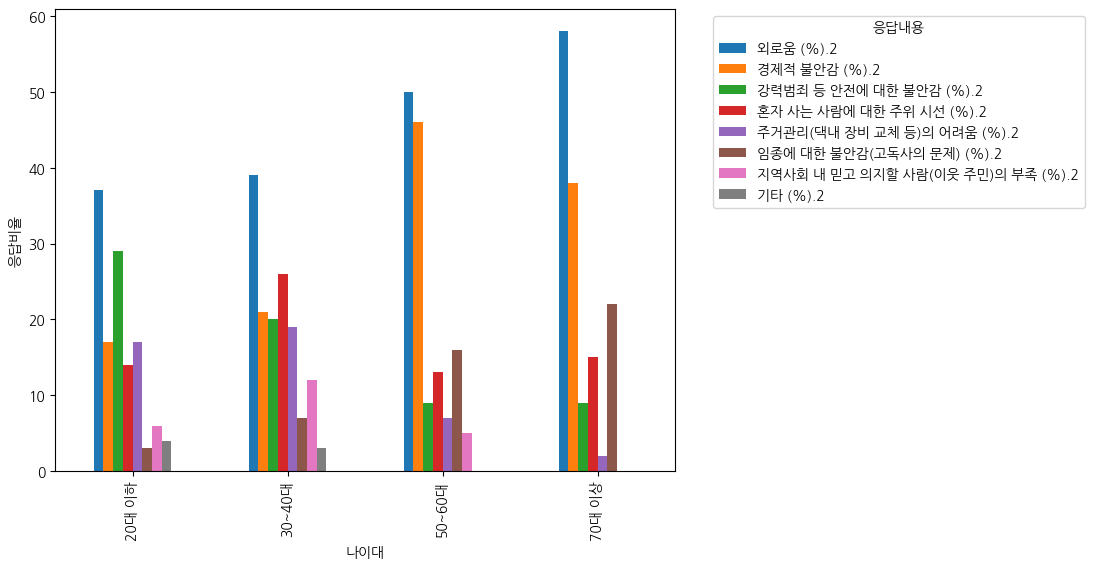

In [9]:
#1+2종합데이터로 비교할 수 있는 그룹 막대 그래프 생성
graph1 = dataf_age.set_index('특성별(2)').plot(kind='bar', stacked=False, figsize=(8,6))

graph1.set_xlabel('나이대')
graph1.set_ylabel('응답비율')

graph1.legend(title='응답내용', loc='upper left', bbox_to_anchor=(1.05, 1))

graph1

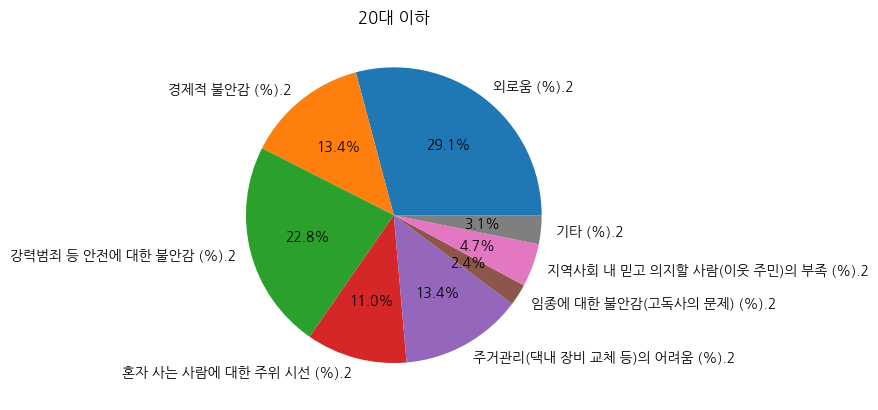

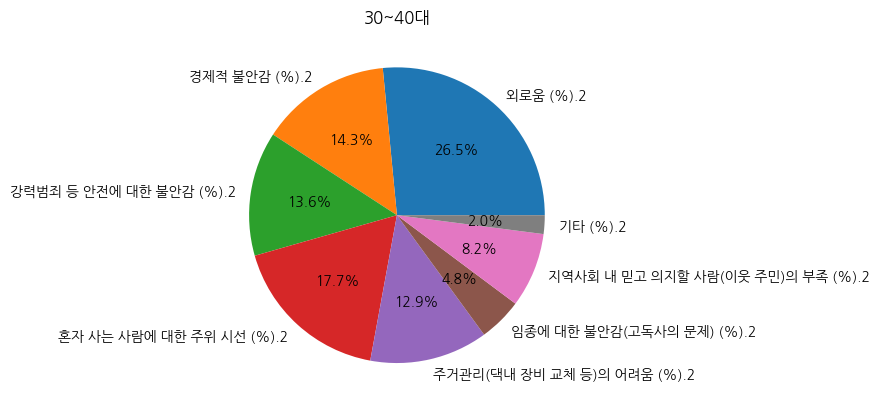

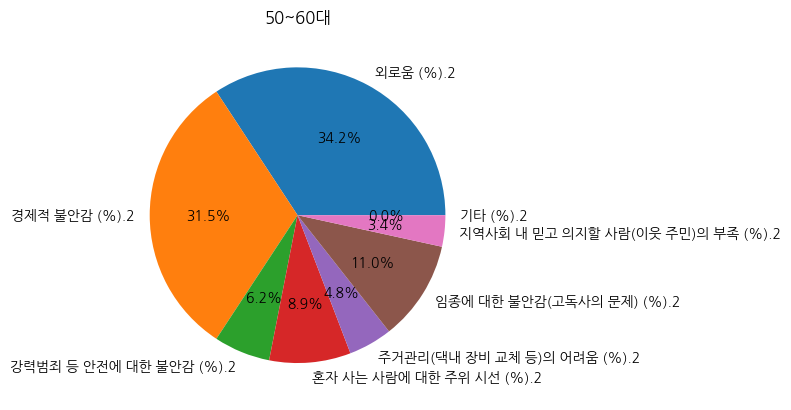

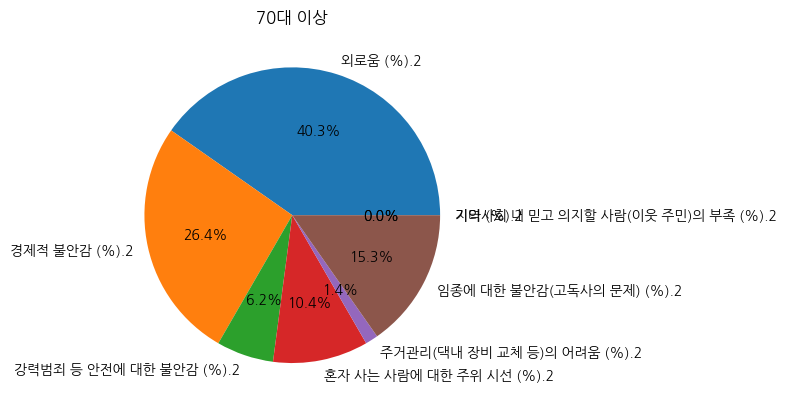

In [10]:
#파이차트로 만들기
for i in range(0,4):
    data = dataf_age.iloc[i, 1:]
    labels = dataf_age.columns[1:]
    plt.pie(data, labels=labels, autopct='%1.1f%%')
    plt.title(data_age.iloc[i, 0])
    plt.show()

정책 종합 데이터

<AxesSubplot:xlabel='나이대', ylabel='응답비율'>

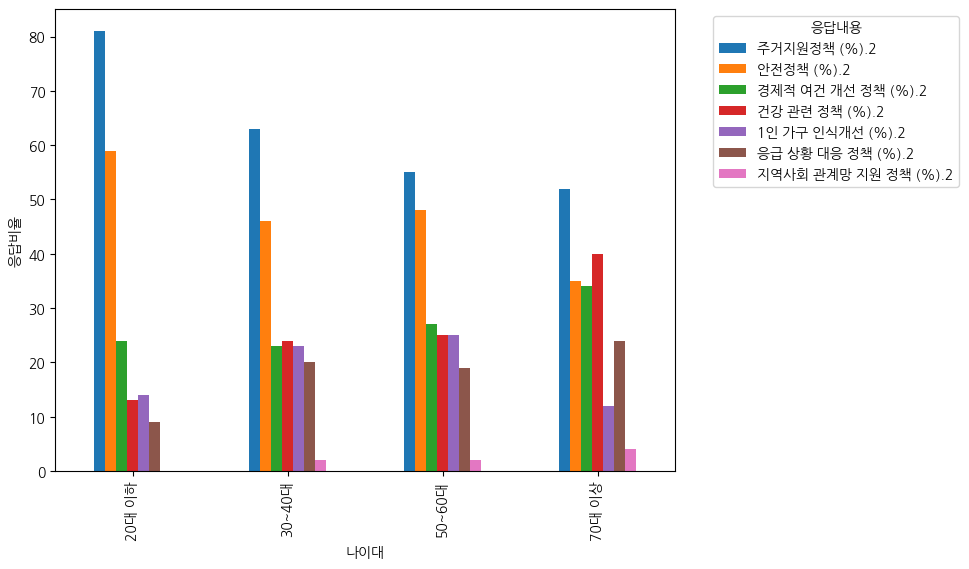

In [11]:
#1+2종합데이터로 비교할 수 있는 그룹 막대 그래프 생성
supgraph = supdata_age.set_index('특성별(2)').plot(kind='bar', stacked=False, figsize=(8,6))

supgraph.set_xlabel('나이대')
supgraph.set_ylabel('응답비율')

supgraph.legend(title='응답내용', loc='upper left', bbox_to_anchor=(1.05, 1))

supgraph

설문결과를 바탕으로 정책의 중요도 파악

<AxesSubplot:xlabel='나이대', ylabel='응답비율'>

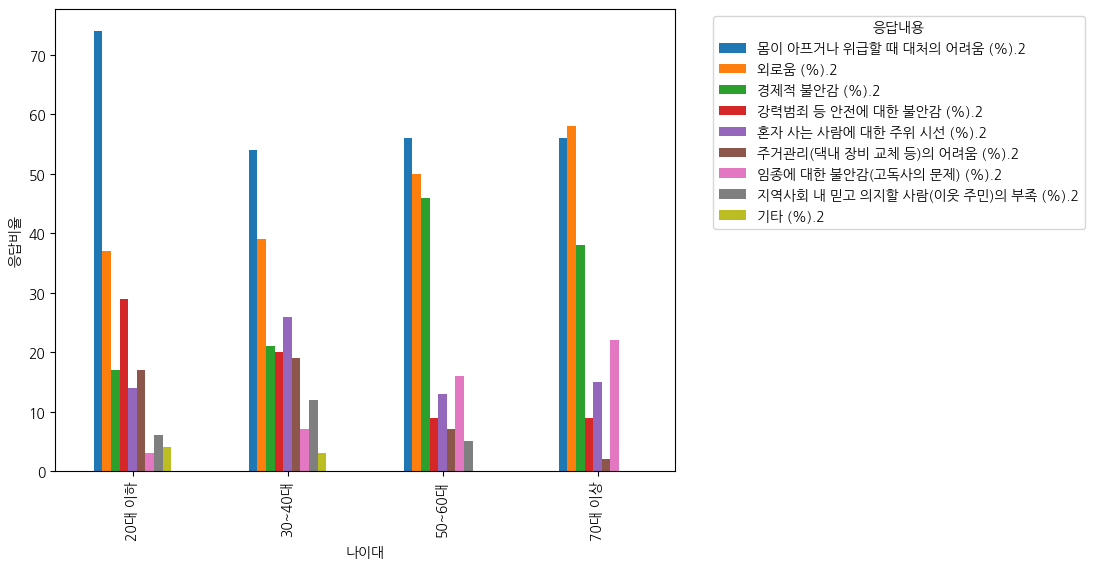

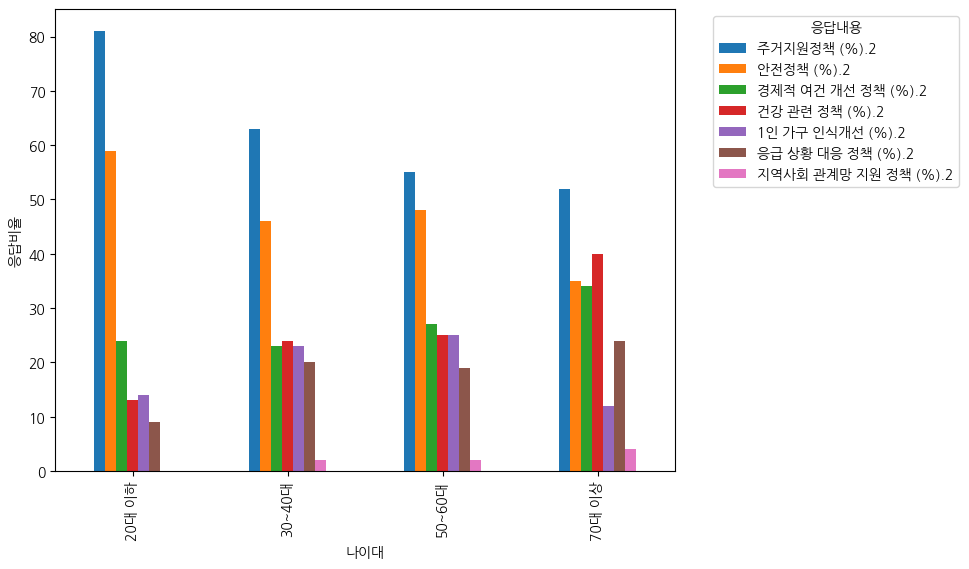

In [64]:
#힘든 요소를 바탕으로 지원 정책의 중요도 및 우선요소 파악하기
graph1 = data_age.set_index('특성별(2)').plot(kind='bar', stacked=False, figsize=(8,6))

graph1.set_xlabel('나이대')
graph1.set_ylabel('응답비율')

graph1.legend(title='응답내용', loc='upper left', bbox_to_anchor=(1.05, 1))

supgraph = supdata_age.set_index('특성별(2)').plot(kind='bar', stacked=False, figsize=(8,6))

supgraph.set_xlabel('나이대')
supgraph.set_ylabel('응답비율')

supgraph.legend(title='응답내용', loc='upper left', bbox_to_anchor=(1.05, 1))

graph1
supgraph